# Homework 1. Foundations of Neural Networks

## Learning Objective

The goal of this homework is to get you familar with some of the foundational mathematical and programming tools used in deep learning, so we will review a little bit of calculus and linear algebra.

## Exercise 1: McCulloch-Pitts Neural Networks

The modern conception of artificial neural networks is essentially the same as the model originally devised by [McCulloch and Pitts in their seminal 1943 paper](https://papers.baulab.info/papers/McCullochPitts-1943.pdf).  In that work, they observed that a biological neuron could be seen as an object that adds up its inputs, possibly weighting some inputs differently from others, and then firing an output only once some threshold is reached.  This can be modeled as a weighted sum followed by a nonlinearity:
    
<img src="https://cs7150.baulab.info/2022-Fall/hw1/mp-model.png" width=800>
    
McCullough and Pitts reasoned about such neurons individually or in very small networks, and they asked: what is the computational power of such networks? Can they reproduce any logical computation? In this exercise we will follow along with their exploration by constructing networks for the various logical operations that can be created with two binary inputs.

Recall examples of these logical operators include: AND ($\land$), OR ($\lor$), NOT ($\neg$), and XOR ($\oplus$). We've provided tables below as a refresher for how these functions behave.

<table>
<tr><th>A AND B ($A \land B$)</th><th>A OR B ($A \lor B$)</th><th>NOT A ($\neg A$)</th><th>A XOR B ($A \oplus B$)</th></tr>
<tr><td>

Input 1 (A) | Input 2 (B) | Output
--------|---------|---------
0  | 0 | 0
1  | 0 | 0
0  | 1 | 0
1  | 1 | 1

</td><td>

Input 1 (A)  | Input 2 (B) | Output
-------|------|------
0  | 0 | 0
1  | 0 | 1
0  | 1 | 1
1  | 1 | 1

</td><td>

Input 1 (A)  | Input 2 (B) | Output
-------|------|------
0  | 0 | 1
1  | 0 | 0
0  | 1 | 1
1  | 1 | 0

</td>
<td>

Input 1  (A)| Input 2 (B)| Output
-------|------|------
0  | 0 | 0
1  | 0 | 1
0  | 1 | 1
1  | 1 | 0

</td>
</tr> </table>


As a starting point to examine the expressive power of the McCulloch-Pitts Neuron, we will see whether it can model simple logical functions.

Review the basic implementation of a neuron provided in the code below. It takes two binary inputs and produces a binary output.
To compute the output, the neuron (1) multiplies its weights, $w_1$ and $w_2$, with their corresponding inputs $x_1$ and $x_2$, (2) adds the bias term, and (3) applies a simple threshold nonlinearity.


In [ ]:
class BinaryNeuron:
    def __init__(self, weight_1, weight_2, bias):
        """
        Store the Neuron's weights, bias, and activation functions
        """
        self.weight_1 = weight_1
        self.weight_2 = weight_2
        self.bias = bias

    def __call__(self, input_1, input_2):
        """
        Accepts two binary inputs and computes the output of the neuron using the initialized weights and bias
        """
        assert input_1 in [0,1] or isinstance(input_1, bool), "Input 1 is not a binary input"
        assert input_2 in [0,1] or isinstance(input_2, bool), "Input 2 is not a binary input"

        weighted_sum = self.weight_1  * input_1  + self.weight_2 * input_2 + self.bias
        return self.activation(weighted_sum)

    def activation(self, x):
        """
        A simple nonlinearity - also known as the heaviside step function.
        The function takes x as input, and returns 1 if x is nonnegative, 0 otherwise.
        """
        if x >= 0:
            return 1
        else:
            return 0


**Question 1.1:**
- By carefully choosing values for the weights $w_1$, $w_2$, and the bias term, show that the McCulloch-Pitts Neuron can accurately model each of the following logical operators: (1) A AND B, (2) A OR B, (3) NOT A, (4) A AND NOT B. For each of these cases, fill in weight and bias values into the table below such that the `BinaryNeuron` properly models the corresponding logical operator.
- You may use the `BinaryNeuron` from above to check your work.
- Hint: While there are many valid solutions, it may be helpful to restrict the values of your weights and biases to be within the range [-2,2].

In [ ]:
#AND Neuron
# Check and show your work (create new cells as needed):
weight_1 = 2
weight_2 = 2
bias = -3
BN = BinaryNeuron(weight_1, weight_2, bias)

print(f"Input\t Output\n-------   -----\nin:[0,0]  out:{BN(0,0)}\nin:[1,0]  out:{BN(1,0)}\nin:[0,1]  out:{BN(0,1)}\nin:[1,1]  out:{BN(1,1)}\n")

Input	 Output
-------   -----
in:[0,0]  out:0
in:[1,0]  out:0
in:[0,1]  out:0
in:[1,1]  out:1



In [ ]:
#OR Neuron
# Check and show your work (create new cells as needed):
weight_1 = 2
weight_2 = 2
bias = -2
BN = BinaryNeuron(weight_1, weight_2, bias)

print(f"Input\t Output\n-------   -----\nin:[0,0]  out:{BN(0,0)}\nin:[1,0]  out:{BN(1,0)}\nin:[0,1]  out:{BN(0,1)}\nin:[1,1]  out:{BN(1,1)}\n")

Input	 Output
-------   -----
in:[0,0]  out:0
in:[1,0]  out:1
in:[0,1]  out:1
in:[1,1]  out:1



In [ ]:
#NOT A Neuron
# Check and show your work (create new cells as needed):
weight_1 = -10
weight_2 = 0
bias = 1
BN = BinaryNeuron(weight_1, weight_2, bias)

print(f"Input\t Output\n-------   -----\nin:[0,0]  out:{BN(0,0)}\nin:[1,0]  out:{BN(1,0)}\nin:[0,1]  out:{BN(0,1)}\nin:[1,1]  out:{BN(1,1)}\n")

Input	 Output
-------   -----
in:[0,0]  out:1
in:[1,0]  out:0
in:[0,1]  out:1
in:[1,1]  out:0



In [ ]:
#A AND NOT B Neuron
# Check and show your work (create new cells as needed):
weight_1 = 4
weight_2 = -2
bias = -3
BN = BinaryNeuron(weight_1, weight_2, bias)

print(f"Input\t Output\n-------   -----\nin:[0,0]  out:{BN(0,0)}\nin:[1,0]  out:{BN(1,0)}\nin:[0,1]  out:{BN(0,1)}\nin:[1,1]  out:{BN(1,1)}\n")

Input	 Output
-------   -----
in:[0,0]  out:0
in:[1,0]  out:1
in:[0,1]  out:0
in:[1,1]  out:0



**Question 1.1 Answer:**
<table>
<tr><th>A AND B ($A \land B$)</th><th>A OR B ($A \lor B$)</th><th>NOT A ($\neg A$)</th><th>A AND NOT B ($A \land (\neg B)$)</th></tr>
<tr><td>

Weight 1 ($w_1$) | Weight 2 ($w_2$) | Bias
--------|---------|---------
2| 2 | -3


</td><td>

Weight 1 ($w_1$) | Weight 2 ($w_2$) | Bias
--------|---------|---------
2| 2 | -2

</td><td>

Weight 1 ($w_1$) | Weight 2 ($w_2$) | Bias
--------|---------|---------
-10| 0 | 1

</td><td>

Weight 1 ($w_1$) | Weight 2 ($w_2$) | Bias
--------|---------|---------
4| -2 | -3

</td>
</tr> </table>

### Most Two-Input Logical Operators are Linearly Separable

One way to think about these logical operators is as simple classification problems where there are 4 input data points, (0,0), (1,0), (0,1), (1,1) that have different labels depending on the operator.

Under this setting, a neuron can be thought of as a simple classifier of these data points. Our `BinaryNeuron` produces a binary response by thresholding its internal activation at 0. The neuron produces an output of 1 if $w_1x_1 + w_2x_2 + b \geq 0$, and otherwise produces 0.

With some manipulation, we can rewrite this inequality to show that the `BinaryNeuron` uses a line that acts a decision boundary between outputting a 1 or a 0. We say that a dataset is **linearly separable** if there exists a line that separates the datapoints that have different labels (i.e. all data points with the label 0 are on one side of the line, and all data points with label 1 are on the other side).


**Question 1.2.1:**
- Derive an equation for a line that separates the data points for the AND logical operator. It may be helpful to write it in slope-intercept form.
- Using the weight and bias values you provided above, plot the line that defines the decision boundary of your neuron for the AND logical operator, as well as the data points colored according to their output label.

**Question 1.2.2:**
- It turns out that the McCulloch-Pitts Neuron can perfectly model almost any logical operator with two inputs, except for XOR (and XNOR). Provide an explanation in the space provided below as to why XOR can't be modeled by a single neuron.


**Question 1.2.1 Answer:**

- Edit Response Here, and the Code Snippet Below

(3, 2)
[0 1 0]
[0 0 1]


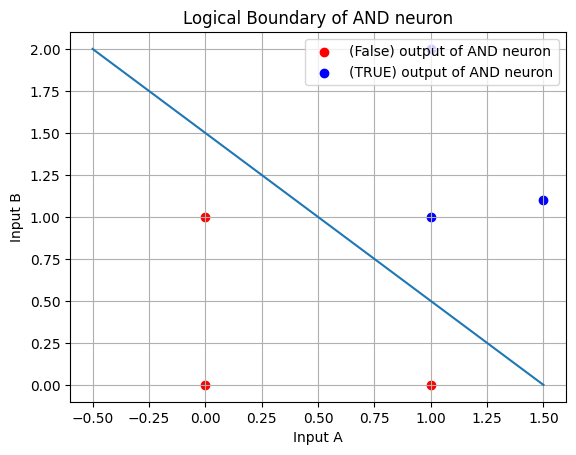

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def return_separator(x1):
  return -1 * x1 + (3/2)

negative_points = np.array([[0,0], [1,0], [0,1]])
positive_points = np.array([[1,1], [1,2], [1.5, 1.1]])
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='(False) output of AND neuron')
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='(TRUE) output of AND neuron')
x1 = np.linspace(-0.5, 1.5, 100)
x2 = return_separator(x1)
plt.title("Logical Boundary of AND neuron")
plt.xlabel('Input A')
plt.ylabel('Input B')
plt.plot(x1, x2)
plt.legend()
plt.grid(True)
print(negative_points.shape)
print(negative_points[:, 0])
print(negative_points[:, 1])
# For the AND logical operator:
# 1. Plot the separating line
# 2. Plot the data points, colored by class label
# 3. Don't forget to add a legend, title, axis labels, etc.

**Question 1.2.2 Answer:**

The McCullough-Pitts neuron works best on linearly separable data.  By examining output table of an XOR neuron, we can see that using just one line cannot define an adequate output boundary.

<table>
<tr><th>A XOR B ($A \oplus B$)</th></tr>
<tr>
<td>

Input 1  (A)| Input 2 (B)| Output
-------|------|------
0  | 0 | 0
1  | 0 | 1
0  | 1 | 1
1  | 1 | 0

</td>
</tr> </table>
In orer to capture all input output combinations, you would need two lines to create the boundary.  The region between the two lines would capture TRUE outputs, while the regions outside of the two lines would capture FALSE outputs. As a result, at least two modified McCullough-Pitts are required to model the XOR logic gate.

## Linear Algebra Review
Given two vectors $w = [w_1,w_2, \ldots, w_n]^{T}$ and $x = [x_1, x_2, \ldots, x_n]^{T} \in \mathbb{R}^{n}$, recall that the **dot product** between $w$ and $x$ can be written as the following sum: $w^{T}x = \sum_{1}^{n}{w_i \cdot x_i}$.
Thus, we can think of any weighted sum as a dot product between a weight vector $w$ and an input vector $x$, where each $w_i$ is the corresponding weight placed on the $i$th element of $x$.

Recall that the **norm** of a vector $v \in R^{n}$ is written as $||v|| = \sqrt{v_1^{2} + \ldots + v_n^{2}}$. We say a vector has **unit length**, or is a **unit vector** when its norm is equal to 1, (i.e. $||v|| = 1$). We can normalize any vector to have unit length by dividing by its norm, $u = \frac{v}{||v||}$.


For any two unit vectors, we can measure how "similar" they are by the angle between them. One way to do this is via **cosine similarity** which is defined between two vectors $x$ and $y$, and is written as: $cos(\theta) = \frac{x ^{T} y}{||x||\cdot||y||}$, where $\theta$ represents the angle between $x$ and $y$.



**Question 1.3:**
Recall the definition of the McCulloch-Pitts neural network as shown in the figure above.
- How might you write the output using a dot product?
- How many vectors are involved, and what dimension are they?

**Question 1.4:**
Suppose you are given a neuron that takes n inputs with weights $w_i$ and bias $b$, where the input vector $x \in \mathbb{R}^{n}$, has norm $||x|| = 1$ and components $x_i$. Suppose also that this neuron has the following activation function: $\sigma(x) = x$, instead of a nonlinearity.
- Which choice of x would maximize the output of the neuron?
- What is the cosine of the angle between this vector $x$ and the vector $w$?

**Question 1.3 Answer:**

-  The output could be written as a non-linearity applied to the dot product of the two following vectors: vector 1 would be the weight vector of dimension 1 x m, vector 2 would be the input vector of dimension m x 1.  When dotted together, they produce a vector of dimension 1 x 1 which can be treated as a scalar and passed into the non-linearity.


**Question 1.4 Answer:**

-  x should be chosen to maxmize the output of the dot product, which is equivalent to maximizing the value of the $\cos(\theta)$ between the two vectors. Therefore, x should be chosen such that x_i = -w_i for all i, with which the cosine of the angle between the two vectors is == 1.  The angle would therefore be 180 degrees between the two vectors. $\cos(\theta)$ is maximized at either 0 degrees or 180 degrees.

## Exercise 2: Neurons as Classifiers

In this exercise, we will explore using neurons to distinguish between two classes of images - (1) cats and (2) jellyfish.



Decades after McCulloch and Pitts, researchers like [Sarah Solla](https://papers.baulab.info/papers/Solla-1988.pdf) and [John Hopfield](https://papers.baulab.info/papers/also/Hopfield-1987.pdf) discovered that networks are very effective when trained to model *probabilities* instead of just discrete binary logic.  Even in the case where the output should make a choice between two alternatives, it is often best to have the network output its estimate of the *probability distribution* of the choice to be made, rather than just a 0 or a 1.

So in modern deep learning, we will often pursue the goal of matching some true vector of discrete probabilities $y \in \mathbb{R}^{n}$ (where $n$ is the number of classes) by computing some model-predicted vector of probabilities $p \in \mathbb{R}^{n}$ that is derived from some raw neural network output $z \in \mathbb{R}^{n}$, and then measuring its deviation from the true distribution $y$.

For this exercise we will use the sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$ to estimate a probability because it squashes input values between 0 and 1.

<!-- Note: Sigmoid is no longer a commonly-used activation function, largely due to its effect on propogating gradients, but we will discuss other approaches to converting activations into probability distributions (softmax and cross-entropy) later in the course. -->

<!-- ...

Experience w/ pytorch, etc. -->

### Download the Image Dataset

Run the following code to download the image dataset and display a sample image for each class.

A black and white image is typically represented as a 2d array that has height x width pixels. While the highest resolution of images provided are 256x256 pixels, we will be working with lower resolution images (6x6) to reduce the number of inputs to our neural network.

In [ ]:
%%capture
!pip install -U git+https://github.com/davidbau/baukit@main#egg=baukit
!rm -f catfish.zip
!wget https://ds4440.baulab.info/data/catfish.zip
!unzip -o catfish.zip

In [ ]:
import torch, torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Grayscale, ToTensor, Normalize

AsSignedTensor = Compose([Grayscale(num_output_channels=1), ToTensor(), Normalize(0.5, 0.5)])
ds = ImageFolder('catfish/size_6/train', transform=AsSignedTensor)
dsv = ImageFolder('catfish/size_6/val', transform=AsSignedTensor)
ds2 = ImageFolder('catfish/size_256/train', transform=AsSignedTensor)


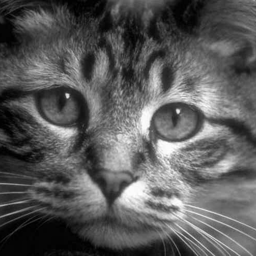


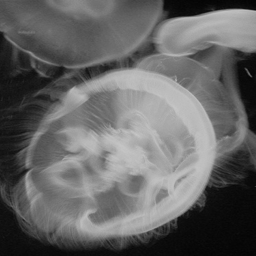

In [ ]:
from baukit.renormalize import as_image
from baukit import show
pixelated = show.style(height=256, width=256, imageRendering='pixelated')

for imgnum in [2, 102]:
    im, c = ds[imgnum]
    im2, c2 = ds2[imgnum]
    show([[pixelated, as_image(im), as_image(im2)]])

In [ ]:
#@title Display Flatten Code

import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_flatten():
    plt.subplot(121)
    # Create a tensor with numbers 1-16
    numbers = torch.arange(1, 17).view(4, 4)

    canvas = torch.ones(16).view(4,4)

    # Plot the grid
    plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)

    # Add text annotations
    for i in range(4):
        for j in range(4):
            plt.text(j, i, str(numbers[i, j].item()), ha='center', va='center', color='black', fontsize=12)

    border = patches.Rectangle((-0.5, -0.5), 4, 4, linewidth=2, edgecolor='black', facecolor='none')
    plt.gca().add_patch(border)

    # Add black gridlines
    for i in range(5):
        plt.axhline(i - 0.5, color='black', linewidth=1)
        plt.axvline(i - 0.5, color='black', linewidth=1)

    # Customize the plot
    plt.title('4x4 Image w/ 16 Pixels')
    plt.axis('off')

    plt.subplot(122)

    # Create a tensor with numbers 1-16
    numbers = torch.ones(16).view(16, 1)

    # Plot the row with white background and black text
    plt.imshow(numbers, cmap='gray', vmin=0, vmax=1, aspect=1.3)

    # Add text annotations with black color
    for j in range(16):
        plt.text(0, j, str(j+1), ha='center', va='center', color='black', fontsize=12)

    # Add black gridlines
    for i in range(2):
        plt.axvline(i - 0.5, color='black', linewidth=1)
    for i in range(17):
        plt.axhline(i - 0.5, color='black', linewidth=1)

    plt.title('16x1 Flattened Image Vector w/ 16 Pixels')
    plt.axis('off')
    plt.grid('all')
    plt.tight_layout()

    # Show the plot
    plt.show()

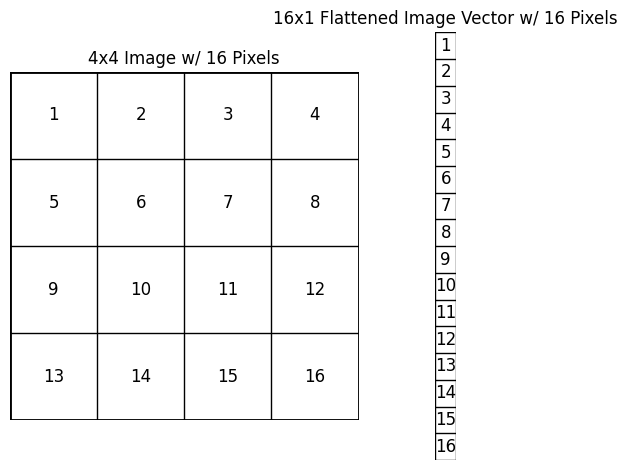

In [ ]:
#@title Flattening a 2d Image Array into a vector
show_flatten()

### Discovering Neuron Weights when Inputs are Larger


We want to create a neural network that is able to predict whether a given image contains a cat or a jellyfish.

Let's denote the data for the $i$th image in the data set as the vector $x_{i}$. Since image is a flattened vector of pixel values, $x_{i}$ is a vector with a number for each pixel.  We'll write $x_{ij}$ for the value of the $j$th pixel in the $i$th image.

Our neural network estimates that the "$x_i$ is-a-Cat" probability $p_i$ when given input $x_i$ by computing the following two things.  First, using its weights $w$ it does a linear operation (a weighted sum over the pixels of $x_i$) to get a score:

$$s_i = w \cdot x_i = \sum_j w_j x_{ij}$$

And then it squishes the score to the range [0, 1] using a nonlinearity (the sigmoid function), so we can interpret the output of the network as a probability.

$$p_i = \sigma(s_i) = \frac{1}{1 + e^{-s_i}}$$

In our case, we can flatten an image into a single vector so that the neuron takes all of the pixels as input. See example above of how we flatten an image into a vector. The number of pixels in an image denoted above as $j$.

Note: This formulation removes the bias term, but we can easily add it back in, or concatenate it as part of our weight vector as $w_{n+1}$ with an additional implicit input of 1 as $x_{n+1}$.

**Question 2.1**

Implement functions for a Neuron:

- `init_neuron_weights` function: It should initialize a neuron weight vector and a bias term each as a torch tensor of zeros, and return them
- `score` function: Computes the dot product of the weights with the input and add the bias term.
- `run_neuron` function: This computes the output of the neuron, by applying the sigmoid activation function to the score.

Note: You can flatten the input image with `.flatten()` to turn it into a vector with a single dimension.

In [ ]:
import numpy as np

def sigmoid(s_i):
    """
    Sigmoid activation function
    """
    return 1 / (1 + torch.exp(-s_i))

def init_neuron_weights(input_size):
    """
    Initialize pytorch tensors representing the neuron weights and bias
    """
    neuron_weights = torch.zeros(input_size) # Replace with torch tensor of appropriate size and initialization
    neuron_bias = torch.zeros(input_size) # Replace with torch tensor of appropriate size and initialization
    return neuron_weights, neuron_bias

def score(neuron_weights, neuron_bias, x_i):
    """
    Computes the dot product of the weights with the input and adds the bias term.
    """
    s_i = np.dot(neuron_weights, x_i.flatten()) + neuron_bias # Replace with appropriate code. Don't forget to flatten the input image!
    return s_i

def run_neuron(neuron_weights, neuron_bias, x_i):
    """
    Applies a sigmoid to the score of an input vector.
    """
    p_i = sigmoid(score(neuron_weights, neuron_bias, x_i)) # Replace with appropriate code to compute the probability of instance x_i.
    return p_i

### Maximum Likelihood Estimation

While we initialize the weights of our neuron to all have a value of zero, in practice we want to find the values of neuron weights that maximize its estimate of the total log probability of the entire data set. This form of parameter estimation is called **Maximum Likelihood Estimation (MLE)**.

To do this we follow a usual convention in neural networks where we define a "Loss" which we want to minimize. Because we want to maximize the log probability, we we can define our loss $L$ as the negative log probability, and we'll minimize that since minimizing a negative is the same as maximizing a positive.

Let $y_i$ be 1 if the instance $x_i$ is a Cat and $y_i=0$ if $x_i$ is a Jellyfish. Then, for an individual instance if the probability of it being a Cat is p_i, the probability of it being a Jellyfish (denoted Jelly below) is 1-p_i. We can write this as $p_i^{y_i} * (1-p_i)^{1-y_i}$. We assume all instances are independent, which means we can write the total probability as a product of the individual probabilities: $\prod_i P_{pred}(x_i) = \prod_i p_i^{y_i}  (1-p_i)^{1-y_i}$.

To compute the log likelihood, we take the log of this product, we can turn the product into a sum as we pull the log inside to give us $\sum_i{log(p_i^{y_i}(1-p_i)^{(1-y_{i})})}$. And simplifying some more, we know this is equivalent to $\sum_i{y_ilog(p_i) + (1-y_i)log(1-p_{i})}$. To get the negative log likelihood, we multiply by negative 1, and then we can filter the classes based on when $y_i=1$, and $y_i=0$, since many of the terms in the sum become zero otherwise. This gives us that the negative log likelihood $L$ can be written as

$$L = - \log \prod_i P_{pred}(x_i) = -\sum_{i \in \text{Cat}} \log p_i - \sum_{i \in \text{Jelly}} \log (1- p_i)$$

**Question 2.2**
- Write a function that computes the log probability of a single data point
- Write a function that computes the negative log likelihood of the entire dataset

In [ ]:
def logprob_of_data_point(input_image, class_label, neuron_weights, neuron_bias):
    """
    Compute the Log Probability of an individual instance.
    input_image is an x_i, and class_label is a y_i.
    """
    p_i = run_neuron(neuron_weights, neuron_bias, input_image) # Replace with appropriate code
    if class_label == 1:
        return torch.log(p_i) # Replace with appropriate code
    else:
        return torch.log(1-p_i) # Replace with appropriate code

def negative_logprob_of_dataset(dataset, neuron_weights, neuron_bias):
    """
    Compute the total negative log probability of the provided dataset. This is the loss function L.
    """
    total_negative_logprob = 0
    for i in range(len(dataset)):
      total_negative_logprob -= logprob_of_data_point(dataset[i][0], dataset[i][1], neuron_weights, neuron_bias)
      # Replace with appropriate code
    return total_negative_logprob

In [ ]:
# Test your code - You should get 50% accuracy before any optimization of the weights

neuron_weights, neuron_bias = init_neuron_weights(36)

def accuracy_of_data_set(dataset, neuron_weights, neuron_bias):
    return sum((run_neuron(neuron_weights,neuron_bias,x_i) > 0.5) == y_i for x_i,y_i in dataset) / len(dataset)

print(f'Initial Neg log likelihood {negative_logprob_of_dataset(ds, neuron_weights, neuron_bias)}')
print(f'Initial Accuracy {accuracy_of_data_set(ds, neuron_weights, neuron_bias)}')

Initial Neg log likelihood tensor([138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292])
Initial Accuracy tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000])


### Minimizing Negative Log Likelihood

Recall from calculus that to minimize a function we can look at where its derivative is zero. We will calculate the derivative with respect to the neuron weights, and then we will find the point where that derivative is zero.  I.e., we want to find the set of $w_j$ where we have

$$\frac{\partial L}{\partial w_j} = 0$$


To figure out what this term is, we can apply the chain rule ($\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$) multiple times to get the derivative of $L$ in terms of $p_i$, and the derivative of $p_i$ in terms of $w_j$. I.e.

$$\frac{\partial L}{\partial w_j} = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial w_j}$$
$$ = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial s_i}\frac{\partial s_i}{\partial w_j}$$

**Question 2.3**
Using "paper and pencil" calculus, solve for each of the partial derivatives that make up the derivative of the loss function. Refer above for definitions of $L$, $p_i$, and $s_i$. Make sure to show your work.

(a) Solve for the derivative of the Loss if $i\in \mathrm{Cat}$, i.e. $\frac{\partial L}{\partial p_i}$

(b) Solve for the derivative of the Loss if $i\in \mathrm{Jelly}$, i.e.$\frac{\partial L}{\partial p_i}$

(c) Solve for the derivative of the the sigmoid of the score, i.e. $\frac{\partial p_i}{\partial s_i}$.  The derivative of the sigmoid is a special thing; normally you'd write the derivative as an expression terms of the input $s_i$, but the sigmoid derivative can be written as a very simple expression using only the output variable $p_i$.  Write $\frac{\partial p_i}{\partial s_i}$ in that form, using only $p_i$.

<!-- (d) Solve for the derivative of the score with respect to a weight $w_j$, i.e. $\frac{\partial s_i}{\partial w_j}$ -->

**Question 2.3 Answers:**

(a) When $i\in \mathrm{Cat}$, $\frac{\partial L}{\partial p_i} = 1/{p_i}$

(b) When $i\in \mathrm{Jelly}$, $\frac{\partial L}{\partial p_i} = 1/{(1 - p_i)}$

(c) $\frac{\partial p_i}{\partial s_i} = \frac{e^{-x}}{(1+e^{-x})^2} = \frac1{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}}
 = (p_i) (1-p_i)$

<!-- (d) Edit Response Here -->

------
Finally we want to know how the weight $w_i$ inflences the score $s_i$.

$$\frac{\partial s_i}{\partial w_j} = \frac{\partial }{\partial w_j} \sum_{j*} w_{j*} x_{ij*} = x_{ij}$$

Remember that we were solving for this:
$$\frac{\partial L}{\partial w_j} = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial w_j}$$
$$ = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial s_i}\frac{\partial s_i}{\partial w_j}$$

When we substitute in all the terms and simplify, we should get
$$ = \sum_{i \in \text{Cat}} (p_i - 1) x_{ij} + \sum_{i \in \text{Jelly}} p_i  x_{ij} $$

Now, let's define the prediction vector $p$ so that its $i$th component is $p_i$ and it contains the predicted probability for every sample in the data set. Let's also define the label vector $y$ so that $y_i = 1$ when $i$ is a Cat and zero otherwise.
Finally, if we define the vector $x_j$ as the vector gathering together all the $x_{ij}$ for the same pixel position $j$, then we can write the derivative as a simple dot-product.

$$\frac{\partial L}{\partial w_j} = (p - y) \cdot x_j$$

For the bias term, we can do the same set of calculations, and we get
$$\frac{\partial L}{\partial b} = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial b} = \sum_i \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial s_i} \frac{\partial s_i}{\partial b} = \sum_{i \in \text{Cat}} (p_i - 1) + \sum_{i \in \text{Jelly}} p_i = \sum_i (p-y) $$

### Use Gradient Descent to Find Optimal Neuron Weights

To summarize, the derivative of the loss function $L$ with respect to the parameters that we care about $w_j$, and $b$ are $\frac{\partial L}{\partial w_j} = (p-y)^{T}x_j$, and $\frac{\partial L}{\partial b} = \sum_{i}({p-y})$. Remember that we want to find when these equations are equal to zero.


It turns out that we cannot solve for a closed-form solution for $w$ and $b$. However, it is pretty easy to solve for using gradient descent if we use $\frac{\partial L}{\partial w}$, and $\frac{\partial L}{\partial b}$ as updates to our estimates of the weight and bias values.

To do so, we can iterate through our dataset and compute $\frac{\partial L}{\partial w}$, and $\frac{\partial L}{\partial b}$. Then, we can update our weights using the following update rules:

$$w_j = w_j - \eta\frac{\partial L}{\partial w_j}$$

and

$$b = b - \eta\frac{\partial L}{\partial b}$$
where $\eta = 0.001$ is the step size.


**Question 2.4**
Implement code in `compute_weight_updates` to compute the weight and bias updates corresponding to $\frac{\partial L}{\partial w}$, and $\frac{\partial L}{\partial b}$. Then, run the gradient descent algorithm to test your implementation and see how well the neuron can classify cats vs. jellyfish.

In [ ]:
import numpy as np
def compute_weight_updates(neuron_weights, neuron_bias, dataset):
    """
    Computes dL_dw and dL_db to solve for neuron weights via gradient descent.
    """
    p_s = []
    y_s = []
    x_s = []

    for x_i, y_i in dataset:
        p_s.append(run_neuron(neuron_weights, neuron_bias, x_i)) # Replace None with appropriate code
        y_s.append(y_i) # Replace None with appropriate code
        x_s.append(x_i.flatten()) # Replace None with appropriate code

    p_minus_y = np.array(p_s) - np.array(y_s)

    dL_dw = np.dot(p_minus_y.T, x_s)
    dL_db = np.sum(p_minus_y)


    return dL_dw, dL_db

def find_neuron_weights(ds, dsv, n_iters=2000):
    """
    Iterative Gradient Descent to optimize neuron weights
    """
    neuron_weights, neuron_bias = init_neuron_weights(36)

    for _ in range(n_iters):
        if _ % 25 == 0:
            print(f'Neg log likelihood {negative_logprob_of_dataset(ds, neuron_weights, neuron_bias)}')
            print(f'Accuracy - train: {accuracy_of_data_set(ds, neuron_weights, neuron_bias)}, val: {accuracy_of_data_set(dsv, neuron_weights, neuron_bias)}')
        dL_dw, dL_db = compute_weight_updates(neuron_weights, neuron_bias,ds)
        neuron_weights -= 0.001 * dL_dw
        neuron_bias -= 0.001 * dL_db

    return neuron_weights, neuron_bias

In [ ]:
# Run gradient descent
final_weights, final_bias = find_neuron_weights(ds, dsv)

Neg log likelihood tensor([138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292])
Accuracy - train: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000]), val: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5

<ipython-input-66-7df62a7c87f6>:15: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  p_minus_y = np.array(p_s) - np.array(y_s)
<ipython-input-66-7df62a7c87f6>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_minus_y = np.array(p_s) - np.array(y_s)
<__array_function__ internals>:180: FutureWarning: The input object of type 'Tensor' is an array-like implementing one o

Neg log likelihood tensor([122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273])
Accuracy - train: tensor([0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800]), val: tensor([0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7

**Extra Credit:**

Even with 6x6 images, the optimization process to find the neuron weights can take quite a long time.

There are several potential bottlenecks here. First, the dataloader used requires that we iterate through a single instance at a time. However, the dataset is small enough that it can be loaded into a single tensor.

Extra Credit will be given for implementing ways to speed up the code above. For example, you might look to answer the following questions:

- Can you re-implement the neuron weight-finding process so that you can do all the computations using only a few matrix multiplies and minimal for loops?
- How much faster is the process if you use a GPU on top of these improvements?

Please provide a writeup of your improvements, as well as any code you may have used below.

In [ ]:
#Plotting GPU vs CPU time
import torch, time
from matplotlib import pyplot as plt


iterations = 100

def find_neuron_weights_fast(ds, dsv, n_iters=100):
    """
    Iterative Gradient Descent to optimize neuron weights
    """
    neuron_weights, neuron_bias = init_neuron_weights(36)
    neuron_weights.cuda()
    neuron_bias.cuda()

    for _ in range(n_iters):
        if _ % 50 == 0:
            print(f'Neg log likelihood {negative_logprob_of_dataset(ds, neuron_weights, neuron_bias)}')
            print(f'Accuracy - train: {accuracy_of_data_set(ds, neuron_weights, neuron_bias)}, val: {accuracy_of_data_set(dsv, neuron_weights, neuron_bias)}')
        dL_dw, dL_db = compute_weight_updates(neuron_weights, neuron_bias,ds)
        neuron_weights -= 0.001 * dL_dw
        neuron_bias -= 0.001 * dL_db

    return neuron_weights, neuron_bias

def time_spent_training_fast():
    start = time.time()
    neuron_weights, neuron_bias = find_neuron_weights_fast(ds, dsv)
    torch.cuda.synchronize()
    elapsed = time.time() - start
    return elapsed
def time_spent_training():
    start = time.time()
    neuron_weights, neuron_bias = find_neuron_weights(ds, dsv, 100)
    torch.cuda.synchronize()
    elapsed = time.time() - start
    return elapsed
cpu_time = time_spent_training()
print(f'time using the CPU alone: {cpu_time:.3g} seconds')

mixed_time, mixed_result = time_spent_training_fast
print(f'time using GPU, moving data from CPU: {mixed_time:.3g} seconds')


plt.figure(figsize=(2,2), dpi=150)
plt.ylabel('iterations per sec')
plt.bar(['cpu', 'mixed', 'pinned', 'gpu'],
        [iterations/cpu_time,
         iterations/mixed_time])
plt.show()

# print(f'Your GPU is {cpu_time / gpu_time:.3g}x faster than CPU'
#       f' but only {cpu_time / mixed_time:.3g}x if data is repeatedly copied from the CPU')
# print(f'When copying from pinned memory, speedup is {cpu_time / pinned_time:.3g}x')
# print(f'Numerical differences between GPU and CPU: {(cpu_result - gpu_result).norm() / cpu_result.norm()}')



Neg log likelihood tensor([138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292, 138.6292,
        138.6292])
Accuracy - train: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000]), val: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5

<ipython-input-66-7df62a7c87f6>:15: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  p_minus_y = np.array(p_s) - np.array(y_s)
<ipython-input-66-7df62a7c87f6>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_minus_y = np.array(p_s) - np.array(y_s)


Neg log likelihood tensor([122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273, 122.1273,
        122.1273])
Accuracy - train: tensor([0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800,
        0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800, 0.6800]), val: tensor([0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx